## **Model LSTM_RNN**

---

Uji Coba #1

Penelitian                             : [IndoNLU](https://github.com/IndoNLP/indonlu)

In [8]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random
import numpy as np
import pandas as pd

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
train = pd.read_csv('..\Dataset\\Training\\Training_Raw2\\train_preprocess.csv')
val = pd.read_csv('..\Dataset\\Training\\Training_Raw2\\valid_preprocess.csv')
test = pd.read_csv('..\Dataset\\Training\\Training_Raw2\\test_preprocess.csv')

In [11]:
def get_tweets(data):
    labels = data['label'].tolist()  
    tweets = data['tweet'].tolist()  
    return tweets, labels

# Memanggil fungsi get_tweets dengan DataFrame train
tweets, labels = get_tweets(train)

In [12]:
tweets[10], labels[10]

('[USERNAME] Gua kelas 1sd bawa hp karna buat hubungin mama. Tau tau dicolong temen. Gua diem aja bego emg. Bibi kantin ngabarin nyokap gua dan lgsg datang lah mama trs bapanya minta maaf. Eh beberapa hari kemudian anaknya pindah sklh. Ya',
 'sadness')

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [14]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(tweets)

print(tokenizer.texts_to_sequences([tweets[10]]))

[[2, 71, 435, 7171, 373, 510, 134, 43, 2718, 309, 55, 55, 7172, 118, 71, 416, 19, 1268, 383, 1947, 3371, 1538, 1269, 71, 3, 610, 301, 91, 309, 214, 4540, 188, 384, 192, 342, 62, 454, 455, 858, 4541, 11]]


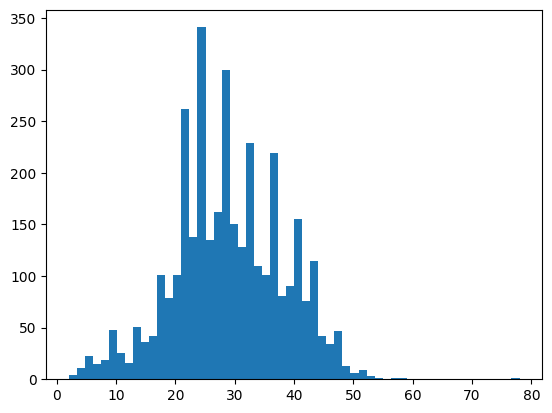

In [15]:
lengths = [len(t.split(' ')) for t in tweets]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [18]:
padded_train_sequences = get_sequences(tokenizer, tweets)

In [19]:
padded_train_sequences[10]

array([   2,   71,  435, 7171,  373,  510,  134,   43, 2718,  309,   55,
         55, 7172,  118,   71,  416,   19, 1268,  383, 1947, 3371, 1538,
       1269,   71,    3,  610,  301,   91,  309,  214, 4540,  188,  384,
        192,  342,   62,  454,  455,  858, 4541,   11,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [20]:
classes = set(labels)
print(classes)

{'love', 'happy', 'anger', 'sadness', 'fear'}


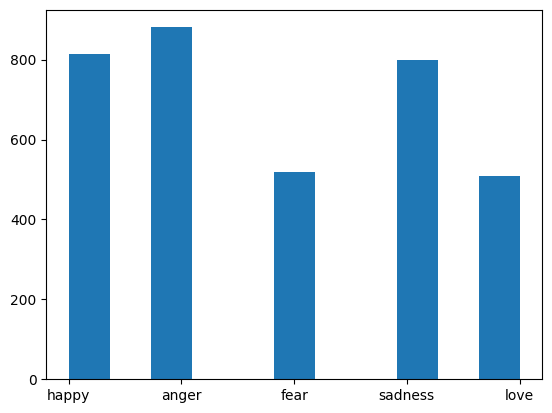

In [21]:
plt.hist(labels, bins=11)
plt.show()

In [22]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [23]:
classes_to_index

{'love': 0, 'happy': 1, 'anger': 2, 'sadness': 3, 'fear': 4}

In [24]:
index_to_classes

{0: 'love', 1: 'happy', 2: 'anger', 3: 'sadness', 4: 'fear'}

In [25]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [26]:
train_labels = names_to_ids(labels)
print(train_labels[10])

3


In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
val_tweets, val_labels = get_tweets(val)
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [29]:
val_tweets[20], val_labels[20]

('Siapa sih di dunia yg ngga punya hater? Rasul yg mulia aja punya. Budha aja punya. Nabi Isa aja punya. Nah apalagi eloh ama gueh .... ya kaaan',
 3)

In [30]:
h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.2316 - loss: 1.6825 - val_accuracy: 0.3523 - val_loss: 1.5138
Epoch 2/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4034 - loss: 1.3867 - val_accuracy: 0.4977 - val_loss: 1.2777
Epoch 3/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6395 - loss: 0.9769 - val_accuracy: 0.4682 - val_loss: 1.3316
Epoch 4/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8156 - loss: 0.5988 - val_accuracy: 0.5114 - val_loss: 1.3469
Epoch 5/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8703 - loss: 0.4420 - val_accuracy: 0.5045 - val_loss: 1.5382
Epoch 6/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9232 - loss: 0.2735 - val_accuracy: 0.5023 - val_loss: 1.7125


In [31]:
test_tweets, test_labels = get_tweets(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [32]:
eval = model.evaluate(test_sequences, test_labels)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5115 - loss: 1.7456


In [49]:
for a in range(0,5):
  i = random.randint(0, len(test_labels) - 1)

  print('Tweet:', test_tweets[i])
  print('Actual Emotion:', index_to_classes[test_labels[i]])

  # Melakukan prediksi dengan model
  pred_prob = model.predict(np.expand_dims(test_sequences[i], axis=0))

  # Mengambil indeks kelas dengan probabilitas tertinggi
  predicted_class_index = np.argmax(pred_prob)

  # Mendapatkan kelas yang sesuai dari dictionary index_to_classes
  predicted_class = index_to_classes[predicted_class_index]

  # Print hasil prediksi
  print('Predicted Emotion:', predicted_class, '\n')

Tweet: Mau Ngucapin Happy Birthday yg ke 24 buat de' Nursehah. smoga berkah umur &amp
Actual Emotion: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Emotion: happy 

Tweet: Aplikasi pencatatan keuangan semacam money manager memang berguna ya. Jadi tahu sebenarnya pengeluaran kita per bulan itu berapa. Yg penting konsisten aja catetnya. Abis ngeluarin uang, walaupun parkir di Indomaret 2000 perak, tetap dicatet.
Actual Emotion: happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Emotion: sadness 

Tweet: Mendengar ada suara aneh disekitarnya. Jek merinding. "tadi ada yg ngomong tidak yaa??" 
Actual Emotion: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Emotion: anger 

Tweet: Penyakit hepatitis B 100x lebih infeksius dari HIV/AIDS Duhh serem! Dan belum ada obatnya.
Actual Emotion: fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Emotion: sadness 

Tweet: Menggapai cita2 kadang bukan hal mudah. Cita2 pengen jadi dokter, tpi gak ada uang. Cita2 pengen jadi tentara tapi